<a href="https://colab.research.google.com/github/creator137/FOR_KT/blob/main/stepan_laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

Набор данных о рыбном рынке


Этот набор данных включает данные о распространенных видах рыб, продаваемых на рыбном рынке.

Атрибуты включают полезные для прогнозирования веса рыбы на основе этих физических характеристик:


1. вид;


2. вес;


2. длину;

3. высоту;

4. ширину;


Источник набора данных : набор данных о рыбном рынке


Метки : Непрерывные значения, представляющие вес рыбы (в граммах).


Область применения : Включает различные виды рыб с такими характеристиками, как длина, высота и ширина.


Размер : 159 образцов, каждый с 7 атрибутами.


Язык : N/A (числовые данные).

Скачаем датасет и загрузим его в фрейм данных.

Распечатаем первые 5 строк.

In [ ]:
data = pd.read_csv("/content/Fish[1].csv")
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Смотрим статистическую информацию о данных с помощью describe()

In [ ]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Смотрим количество пропусков в датасете

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Пропусков нет

Смотрим названия колонок

In [ ]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Смотрим количество строк и столбцов

In [ ]:
data.shape

(159, 7)

В качестве таргета выберем вес рыбы.

Удалим его из исходного датасета.

In [ ]:
y = data.pop('Weight')

Проверим, содержит ли датасет категориальные признаки

In [ ]:
categorical_columns = [
    c for c in data.columns if data[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data.columns if data[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Species']
numerical_columns: ['Length1', 'Length2', 'Length3', 'Height', 'Width']


Содержит, значит, их нужно закодировать с помощью get_dummies

In [ ]:
df = pd.concat(
    [data[numerical_columns], pd.get_dummies(data[categorical_columns])],
    axis=1,
)

Разделим исходный датасет на train и test в пропорциях (70/30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.3, random_state=17, shuffle=True
)

Нормализуем данные.

Применим MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_scaled_train = scaler.fit_transform(X_train)
df_scaled_test = scaler.transform(X_test)

In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Применим несколько моделей.

Затем выберем лучшие модели и визуализируем результаты.

In [ ]:
#Линейная регрессия
modelLR = LinearRegression()
modelLR.fit(df_scaled_train, y_train)
y_pr_LR = modelLR.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelLR, df_scaled_train, y_train, df_scaled_test, y_test, y_pr_LR)

RMSE:  90.0258
  R2: 0.9276
 Adjusted R2: 0.9028
 Cross Validated R2: 0.877


In [ ]:
#Полиномиальная регрессия
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features_train = poly.fit_transform(df_scaled_train)
poly_features_test = poly.transform(df_scaled_test)


modelPR = Ridge()
modelPR.fit(poly_features_train, y_train)
y_pr_PR = modelPR.predict(poly_features_test)
_ = Reg_Models_Evaluation_Metrics(modelPR, poly_features_train, y_train, poly_features_test, y_test, y_pr_PR)

RMSE:  43.7955
  R2: 0.9829
 Adjusted R2: 1.002
 Cross Validated R2: 0.9716


In [ ]:
#Деревья принятия решений
modelDT = DecisionTreeRegressor()
modelDT.fit(df_scaled_train, y_train)
y_dt_pred = modelDT.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, df_scaled_train, y_train, df_scaled_test, y_test, y_dt_pred)

RMSE:  99.9883
  R2: 0.9107
 Adjusted R2: 0.8801
 Cross Validated R2: 0.9214


In [ ]:
#Случайный лес
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(df_scaled_train, y_train)
y_rf_pred = modelRF.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelRF, df_scaled_train, y_train, df_scaled_test, y_test, y_rf_pred)

RMSE:  78.6973
  R2: 0.9447
 Adjusted R2: 0.9257
 Cross Validated R2: 0.9626


In [ ]:
#Метод опорных векторов
modelSVR = SVR(kernel='poly')
modelSVR.fit(df_scaled_train, y_train)
y_svr_pred = modelSVR.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, df_scaled_train, y_train, df_scaled_test, y_test, y_svr_pred)

RMSE:  250.2815
  R2: 0.4407
 Adjusted R2: 0.2489
 Cross Validated R2: 0.326


In [ ]:
#ElasticNet
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(df_scaled_train, y_train)
y_en_pred = modelEN.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelEN, df_scaled_train, y_train, df_scaled_test, y_test, y_en_pred)

RMSE:  87.459
  R2: 0.9317
 Adjusted R2: 0.9083
 Cross Validated R2: 0.8712


In [ ]:
#Градиентный бустинг
modelGBR = GradientBoostingRegressor(random_state=0)
modelGBR.fit(df_scaled_train, y_train)
y_gbr_pred = modelGBR.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelGBR, df_scaled_train, y_train, df_scaled_test, y_test, y_gbr_pred)

RMSE:  79.5666
  R2: 0.9435
 Adjusted R2: 0.9241
 Cross Validated R2: 0.9617


Наилушее качество у моделей: Градиентный бустинг и Случайный лес.

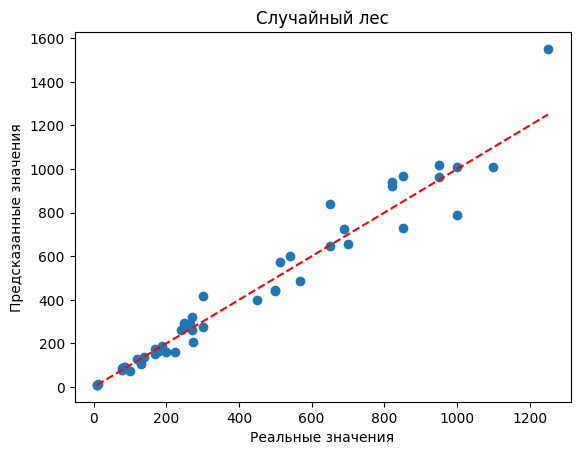

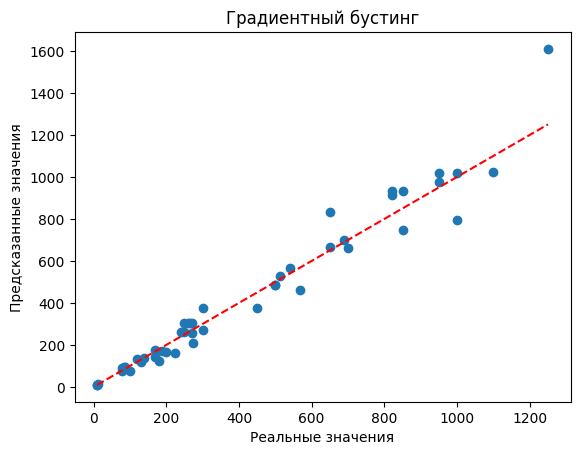

In [ ]:
plt.scatter(y_test, y_rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')
plt.show()

plt.scatter(y_test, y_gbr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Градиентный бустинг')
plt.show()

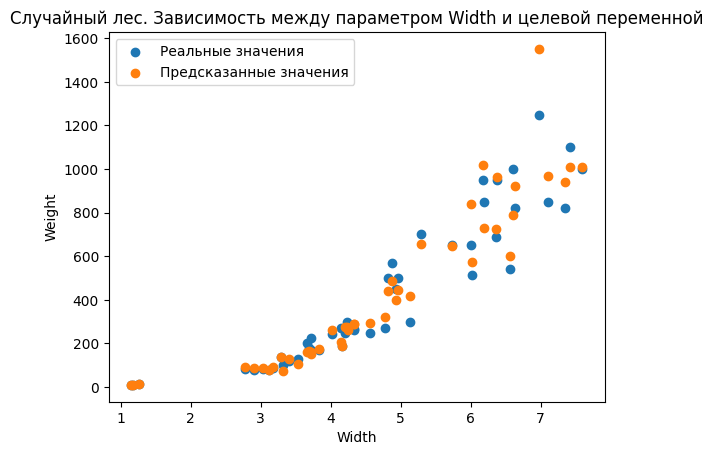

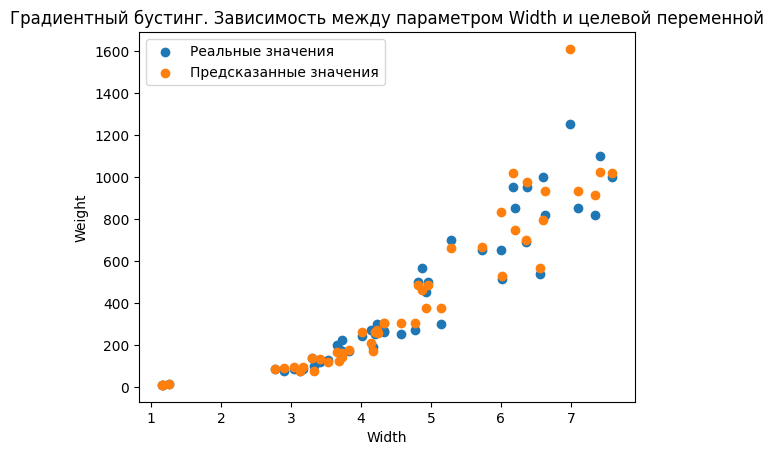

In [ ]:
plt.scatter(X_test['Width'], y_test, label='Реальные значения')
plt.scatter(X_test['Width'], y_rf_pred, label='Предсказанные значения')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Случайный лес. Зависимость между параметром Width и целевой переменной')
plt.legend()
plt.show()

plt.scatter(X_test['Width'], y_test, label='Реальные значения')
plt.scatter(X_test['Width'], y_gbr_pred, label='Предсказанные значения')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Градиентный бустинг. Зависимость между параметром Width и целевой переменной')
plt.legend()
plt.show()